In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [50]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [51]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)

    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [61]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]
    
    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []

    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=float)
        x_l = np.array(x_l, dtype=float)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=int)
    x_l = np.array(x_l, dtype=int)

    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [62]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'deeplog2_a'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622989e+09,-49.66833,517,323,27,813,0.791667


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622989e+09,-49.66833,740,460,36,1164,0.793333


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622989e+09,0,20,-75.307334,241,599,61,779,0.607143
1,1.622989e+09,1,30,-68.795858,334,506,116,724,0.629762
2,1.622989e+09,2,40,-68.978833,383,457,102,738,0.667262
3,1.622990e+09,3,50,-72.963082,386,454,82,758,0.680952


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.622989e+09,0,20,-75.307334,338,862,90,1110,0.603333
1,1.622989e+09,1,30,-68.795858,482,718,191,1009,0.621250
2,1.622989e+09,2,40,-68.978833,547,653,162,1038,0.660417
3,1.622990e+09,3,50,-72.963082,536,664,120,1080,0.673333


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622989e+09,0,20,hamming,0.596627,0.541326,0.568976
1,1.622989e+09,0,20,hamming_wise,12.141667,10.061667,11.101667
2,1.622989e+09,0,20,cosine,0.085805,0.080207,0.083006
3,1.622989e+09,1,30,hamming,0.472826,0.424227,0.448526
4,1.622989e+09,1,30,hamming_wise,9.566667,7.754167,8.660417
5,1.622989e+09,1,30,cosine,0.071529,0.065045,0.068287
6,1.622989e+09,2,40,hamming,0.387891,0.337332,0.362612
7,1.622989e+09,2,40,hamming_wise,7.815000,6.174167,6.994583
8,1.622989e+09,2,40,cosine,0.063228,0.057115,0.060172
9,1.622990e+09,3,50,hamming,0.316694,0.276991,0.296843


'Test acc'

,eps,acc
0,20,0.603333
1,30,0.621250
2,40,0.660417
3,50,0.673333


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.622989e+09,0,20,hamming,0.596627,0.541326,0.568976
3,1.622989e+09,1,30,hamming,0.472826,0.424227,0.448526
6,1.622989e+09,2,40,hamming,0.387891,0.337332,0.362612
9,1.622990e+09,3,50,hamming,0.316694,0.276991,0.296843


'Mean hamming'

,eps,mean_all
0,20,0.568976
3,30,0.448526
6,40,0.362612
9,50,0.296843


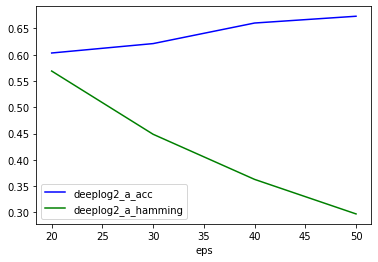

In [63]:
exps = ['deeplog2_a']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_b'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622990e+09,-23.219786,744,96,94,746,0.886905


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622990e+09,-23.219786,1070,130,138,1062,0.888333


'Utility Val'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.622994e+09,0,no_dp,0,-68.262605,519,321,245,595,0.663095
1,1.622994e+09,1,20,1,-12.459101,800,40,297,543,0.799405
2,1.622994e+09,2,30,1,-65.084875,512,328,142,698,0.720238
3,1.622994e+09,3,40,1,-67.555680,475,365,45,795,0.755952
4,1.622995e+09,4,50,1,-71.464921,464,376,28,812,0.759524
5,1.622995e+09,5,60,1,-45.220182,471,369,35,805,0.759524
6,1.622996e+09,6,100,1,-48.366164,660,180,119,721,0.822024


'Utility Test'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.622994e+09,0,no_dp,0,-68.262605,718,482,339,861,0.657917
1,1.622994e+09,1,20,1,-12.459101,1124,76,416,784,0.795000
2,1.622994e+09,2,30,1,-65.084875,732,468,207,993,0.718750
3,1.622995e+09,3,40,1,-67.555680,687,513,60,1140,0.761250
4,1.622995e+09,4,50,1,-71.464921,669,531,41,1159,0.761667
5,1.622995e+09,5,60,1,-45.220182,681,519,51,1149,0.762500
6,1.622996e+09,6,100,1,-48.366164,951,249,161,1039,0.829167


'Sim Test'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.622994e+09,0,no_dp,0,hamming,0.881028,0.814348,0.847688
1,1.622994e+09,0,no_dp,0,hamming_wise,18.079167,15.713333,16.896250
2,1.622994e+09,0,no_dp,0,cosine,0.194057,0.165693,0.179875
3,1.622994e+09,1,20,1,hamming,0.164430,0.301595,0.233013
4,1.622994e+09,1,20,1,hamming_wise,3.618333,5.748333,4.683333
5,1.622994e+09,1,20,1,cosine,0.052920,0.083110,0.068015
6,1.622994e+09,2,30,1,hamming,0.143904,0.276064,0.209984
7,1.622994e+09,2,30,1,hamming_wise,3.132500,5.181667,4.157083
8,1.622994e+09,2,30,1,cosine,0.046167,0.079757,0.062962
9,1.622995e+09,3,40,1,hamming,0.141614,0.266058,0.203836


'Test acc'

,eps,acc
0,no_dp,0.657917
1,20,0.795000
2,30,0.718750
3,40,0.761250
4,50,0.761667
5,60,0.762500
6,100,0.829167


'All hamming'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.622994e+09,0,no_dp,0,hamming,0.881028,0.814348,0.847688
3,1.622994e+09,1,20,1,hamming,0.164430,0.301595,0.233013
6,1.622994e+09,2,30,1,hamming,0.143904,0.276064,0.209984
9,1.622995e+09,3,40,1,hamming,0.141614,0.266058,0.203836
12,1.622995e+09,4,50,1,hamming,0.139955,0.265965,0.202960
15,1.622995e+09,5,60,1,hamming,0.140646,0.263415,0.202031
18,1.622996e+09,6,100,1,hamming,0.139071,0.258626,0.198848


'Mean hamming'

,eps,mean_all
0,no_dp,0.847688
3,20,0.233013
6,30,0.209984
9,40,0.203836
12,50,0.202960
15,60,0.202031
18,100,0.198848


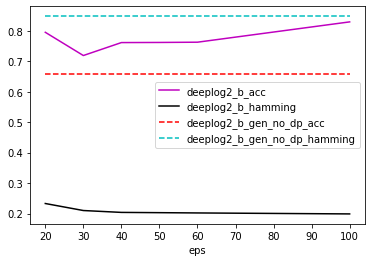

In [64]:
exps = ['deeplog2_b']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_c'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.622996e+09,-23.438904,840,0,208,632,0.87619
1,1.623028e+09,-23.438904,840,0,208,632,0.87619
2,1.623029e+09,-23.438904,840,0,208,632,0.87619


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.622996e+09,-23.438904,1200,0,284,916,0.881667
1,1.623028e+09,-23.438904,1200,0,284,916,0.881667
2,1.623029e+09,-23.438904,1200,0,284,916,0.881667


'Utility Val'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.623029e+09,no_dp,0,-65.738518,432,408,126,714,0.682143
1,1.623030e+09,0.5,1,-3.496695,835,5,544,296,0.673214
2,1.623030e+09,1,1,-5.075769,616,224,335,505,0.667262
3,1.623030e+09,10,1,-4.027310,836,4,564,276,0.661905
4,1.623031e+09,20,1,-4.527927,752,88,633,207,0.570833
5,1.623031e+09,40,1,-40.054499,76,764,53,787,0.513690
6,1.623032e+09,50,1,-66.760298,18,822,7,833,0.506548
7,1.623032e+09,100,1,-39.891295,70,770,39,801,0.518452


'Utility Test'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.623029e+09,no_dp,0,-65.738518,635,565,163,1037,0.696667
1,1.623030e+09,0.5,1,-3.496695,1195,5,764,436,0.679583
2,1.623030e+09,1,1,-5.075769,873,327,440,760,0.680417
3,1.623030e+09,10,1,-4.027310,1193,7,821,379,0.655000
4,1.623031e+09,20,1,-4.527927,1073,127,909,291,0.568333
5,1.623031e+09,40,1,-40.054499,117,1083,95,1105,0.509167
6,1.623032e+09,50,1,-66.760298,34,1166,16,1184,0.507500
7,1.623032e+09,100,1,-39.891295,98,1102,57,1143,0.517083


'Sim Test'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.623029e+09,no_dp,0,hamming,0.152470,0.258318,0.205394
1,1.623029e+09,no_dp,0,hamming_wise,3.294167,5.579167,4.436667
2,1.623029e+09,no_dp,0,cosine,0.052269,0.070088,0.061179
3,1.623030e+09,0.5,1,hamming,0.928382,0.842498,0.885440
4,1.623030e+09,0.5,1,hamming_wise,19.050000,16.380000,17.715000
5,1.623030e+09,0.5,1,cosine,0.308249,0.247849,0.278049
6,1.623030e+09,1,1,hamming,0.923281,0.847878,0.885580
7,1.623030e+09,1,1,hamming_wise,18.944167,16.316667,17.630417
8,1.623030e+09,1,1,cosine,0.303208,0.252902,0.278055
9,1.623030e+09,10,1,hamming,0.897629,0.823159,0.860394


'Test acc'

,eps,acc
0,no_dp,0.696667
1,0.5,0.679583
2,1,0.680417
3,10,0.655000
4,20,0.568333
5,40,0.509167
6,50,0.507500
7,100,0.517083


'All hamming'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.623029e+09,no_dp,0,hamming,0.152470,0.258318,0.205394
3,1.623030e+09,0.5,1,hamming,0.928382,0.842498,0.885440
6,1.623030e+09,1,1,hamming,0.923281,0.847878,0.885580
9,1.623030e+09,10,1,hamming,0.897629,0.823159,0.860394
12,1.623031e+09,20,1,hamming,0.847214,0.793380,0.820297
15,1.623031e+09,40,1,hamming,0.786132,0.737058,0.761595
18,1.623032e+09,50,1,hamming,0.760720,0.724557,0.742639
21,1.623032e+09,100,1,hamming,0.655989,0.651141,0.653565


'Mean hamming'

,eps,mean_all
0,no_dp,0.205394
3,0.5,0.885440
6,1,0.885580
9,10,0.860394
12,20,0.820297
15,40,0.761595
18,50,0.742639
21,100,0.653565


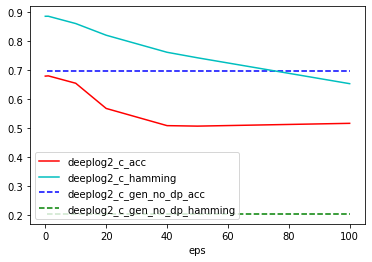

In [65]:
exps = ['deeplog2_c']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()